In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from cmdstanpy import CmdStanModel
import numpy as np

In [21]:
data = pd.read_csv('heart.csv').dropna()
data_pd = data.copy()

In [22]:
data1 = data[['age', 'trestbps', 'thalach']]
data1

,age,trestbps,thalach
0,63,145,150
1,37,130,187
2,41,130,172
3,56,120,178
4,57,120,163
...,...,...,...
298,57,140,123
299,45,110,132
300,68,144,141
301,57,130,115


In [23]:
data2 = data[['age', 'trestbps', 'thalach', 'cp', 'chol', 'oldpeak']]
data2

,age,trestbps,thalach,cp,chol,oldpeak
0,63,145,150,3,233,2.3
1,37,130,187,2,250,3.5
2,41,130,172,1,204,1.4
3,56,120,178,1,236,0.8
4,57,120,163,0,354,0.6
...,...,...,...,...,...,...
298,57,140,123,0,241,0.2
299,45,110,132,3,264,1.2
300,68,144,141,0,193,3.4
301,57,130,115,0,131,1.2


**Prior model 1**

In [31]:
model1 = CmdStanModel(stan_file='prior_combined1.stan')
sim = model1.sample(iter_sampling=100,
                        iter_warmup=1000,
                        chains=1,
                        seed=242522,)
prior_model1 = sim.draws_pd()

21:26:25 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

21:26:26 - cmdstanpy - INFO - CmdStan done processing.


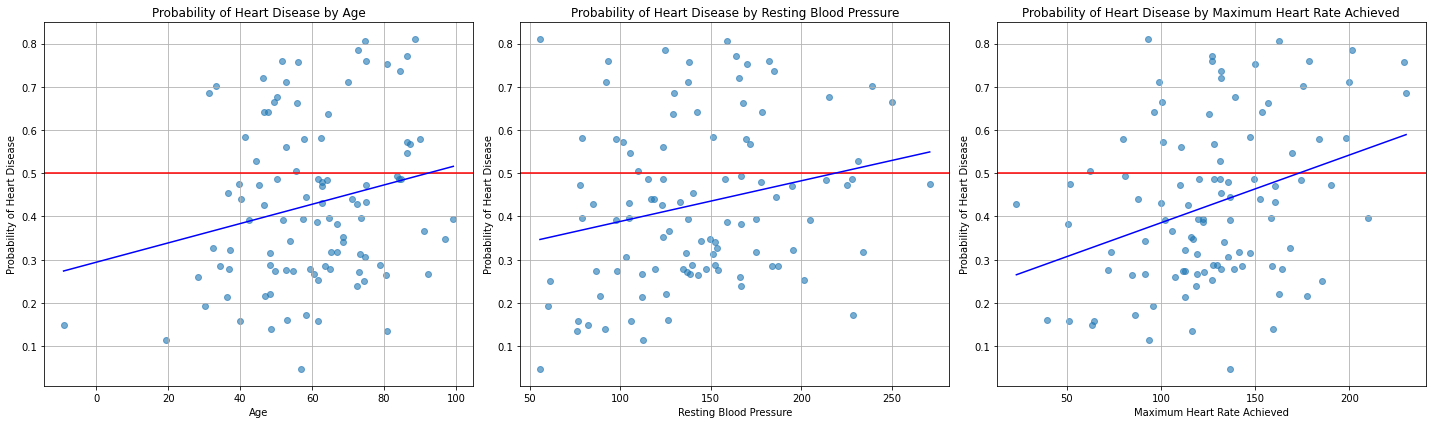

In [25]:
fig, axs = plt.subplots(1, 3, figsize=(20, 6))

# First subplot
x_age = prior_model1['age']
y_prob = prior_model1['combined_heart_disease_prob']
axs[0].scatter(x_age, y_prob, alpha=0.6)
axs[0].axhline(y=0.5, color='red', linestyle='-')

# Compute regression line
coeffs = np.polyfit(x_age, y_prob, 1)
x_range = np.linspace(x_age.min(), x_age.max(), 100)
axs[0].plot(x_range, np.polyval(coeffs, x_range), color='blue', linestyle='-')

axs[0].set_xlabel('Age')
axs[0].set_ylabel('Probability of Heart Disease')
axs[0].set_title('Probability of Heart Disease by Age')
axs[0].grid(True)

# Second subplot
x_bps = prior_model1['bps']
axs[1].scatter(x_bps, y_prob, alpha=0.6)
axs[1].axhline(y=0.5, color='red', linestyle='-')

# Compute regression line
coeffs = np.polyfit(x_bps, y_prob, 1)
x_range = np.linspace(x_bps.min(), x_bps.max(), 100)
axs[1].plot(x_range, np.polyval(coeffs, x_range), color='blue', linestyle='-')

axs[1].set_xlabel('Resting Blood Pressure')
axs[1].set_ylabel('Probability of Heart Disease')
axs[1].set_title('Probability of Heart Disease by Resting Blood Pressure')
axs[1].grid(True)

# Third subplot
x_thalach = prior_model1['thalach']
axs[2].scatter(x_thalach, y_prob, alpha=0.6)
axs[2].axhline(y=0.5, color='red', linestyle='-')

# Compute regression line
coeffs = np.polyfit(x_thalach, y_prob, 1)
x_range = np.linspace(x_thalach.min(), x_thalach.max(), 100)
axs[2].plot(x_range, np.polyval(coeffs, x_range), color='blue', linestyle='-')

axs[2].set_xlabel('Maximum Heart Rate Achieved')
axs[2].set_ylabel('Probability of Heart Disease')
axs[2].set_title('Probability of Heart Disease by Maximum Heart Rate Achieved')
axs[2].grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

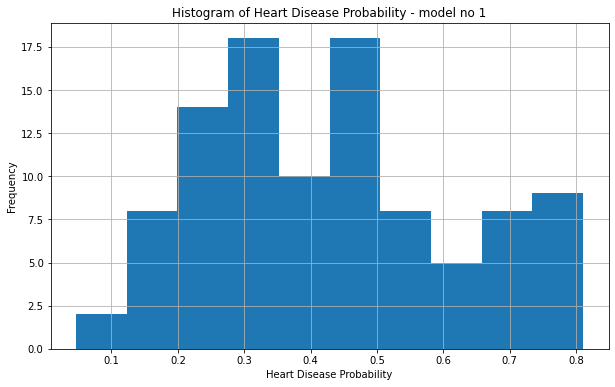

In [26]:
plt.figure(figsize=(10, 6))
plt.hist(prior_model1['combined_heart_disease_prob'])
plt.title('Histogram of Heart Disease Probability - model no 1')
plt.xlabel('Heart Disease Probability')
plt.ylabel('Frequency')
plt.grid()
plt.show()

**Prior model 2**

In [27]:
model2 = CmdStanModel(stan_file='prior_combined2.stan')
sim = model2.sample(iter_sampling=100,
                        iter_warmup=1000,
                        chains=1,
                        seed=242522,)
prior_model2 = sim.draws_pd()

20:57:54 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

20:57:54 - cmdstanpy - INFO - CmdStan done processing.


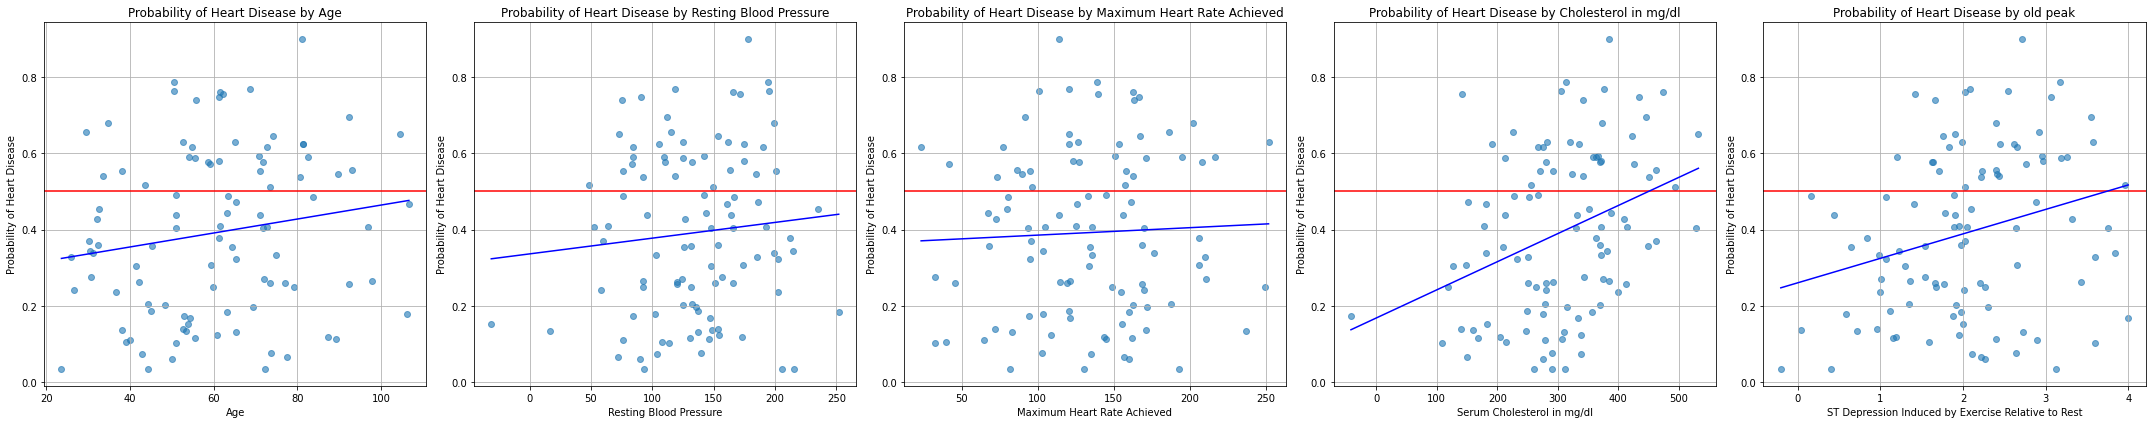

In [28]:
fig, axs = plt.subplots(1, 5, figsize=(30, 6))

# Common y variable
y_prob = prior_model2['combined_heart_disease_prob']

# First subplot
x_age = prior_model2['age']
axs[0].scatter(x_age, y_prob, alpha=0.6)
axs[0].axhline(y=0.5, color='red', linestyle='-')
coeffs = np.polyfit(x_age, y_prob, 1)
x_range = np.linspace(x_age.min(), x_age.max(), 100)
axs[0].plot(x_range, np.polyval(coeffs, x_range), color='blue', linestyle='-')
axs[0].set_xlabel('Age')
axs[0].set_ylabel('Probability of Heart Disease')
axs[0].set_title('Probability of Heart Disease by Age')
axs[0].grid(True)

# Second subplot
x_bps = prior_model2['bps']
axs[1].scatter(x_bps, y_prob, alpha=0.6)
axs[1].axhline(y=0.5, color='red', linestyle='-')
coeffs = np.polyfit(x_bps, y_prob, 1)
x_range = np.linspace(x_bps.min(), x_bps.max(), 100)
axs[1].plot(x_range, np.polyval(coeffs, x_range), color='blue', linestyle='-')
axs[1].set_xlabel('Resting Blood Pressure')
axs[1].set_ylabel('Probability of Heart Disease')
axs[1].set_title('Probability of Heart Disease by Resting Blood Pressure')
axs[1].grid(True)

# Third subplot
x_thalach = prior_model2['thalach']
axs[2].scatter(x_thalach, y_prob, alpha=0.6)
axs[2].axhline(y=0.5, color='red', linestyle='-')
coeffs = np.polyfit(x_thalach, y_prob, 1)
x_range = np.linspace(x_thalach.min(), x_thalach.max(), 100)
axs[2].plot(x_range, np.polyval(coeffs, x_range), color='blue', linestyle='-')
axs[2].set_xlabel('Maximum Heart Rate Achieved')
axs[2].set_ylabel('Probability of Heart Disease')
axs[2].set_title('Probability of Heart Disease by Maximum Heart Rate Achieved')
axs[2].grid(True)

# Fourth subplot
x_chol = prior_model2['chol']
axs[3].scatter(x_chol, y_prob, alpha=0.6)
axs[3].axhline(y=0.5, color='red', linestyle='-')
coeffs = np.polyfit(x_chol, y_prob, 1)
x_range = np.linspace(x_chol.min(), x_chol.max(), 100)
axs[3].plot(x_range, np.polyval(coeffs, x_range), color='blue', linestyle='-')
axs[3].set_xlabel('Serum Cholesterol in mg/dl')
axs[3].set_ylabel('Probability of Heart Disease')
axs[3].set_title('Probability of Heart Disease by Cholesterol in mg/dl')
axs[3].grid(True)

# Fifth subplot
x_old_peak = prior_model2['old_peak']
axs[4].scatter(x_old_peak, y_prob, alpha=0.6)
axs[4].axhline(y=0.5, color='red', linestyle='-')
coeffs = np.polyfit(x_old_peak, y_prob, 1)
x_range = np.linspace(x_old_peak.min(), x_old_peak.max(), 100)
axs[4].plot(x_range, np.polyval(coeffs, x_range), color='blue', linestyle='-')
axs[4].set_xlabel('ST Depression Induced by Exercise Relative to Rest')
axs[4].set_ylabel('Probability of Heart Disease')
axs[4].set_title('Probability of Heart Disease by old peak')
axs[4].grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

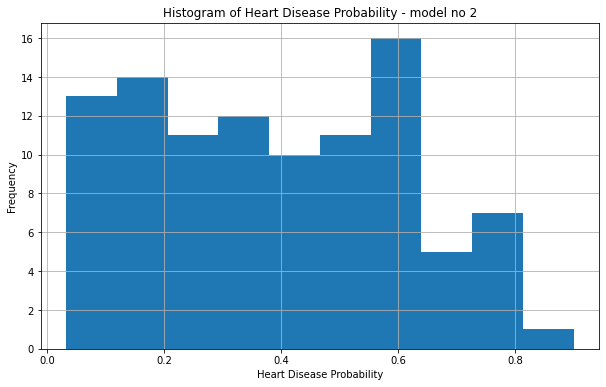

In [29]:
plt.figure(figsize=(10, 6))
plt.hist(prior_model2['combined_heart_disease_prob'])
plt.title('Histogram of Heart Disease Probability - model no 2')
plt.xlabel('Heart Disease Probability')
plt.ylabel('Frequency')
plt.grid()
plt.show()